# Étude numérique de l'action d'un filtre sur un signal périodique

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N=100   # Nombre d'harmoniques utilisées dans le calcul
w0=1.0   # La pulsation fondamentale du signal

On commence par créer la liste des amplitudes et des phases des harmoniques d'un signal carré. Pour ce type de signal, les amplitudes $a_n$ et les phases $\varphi_n$ sont
$$ a_n = 
  \begin{cases}
    \frac{1}{n} \quad \text{si $n$ est impair} \\
    0 \quad \text{si $n$ est pair}
  \end{cases} \quad \text{et $\varphi_n = \frac{\pi}{2}$ }
 $$

In [2]:
ampl_carre = np.zeros(N)
phi_carre = np.zeros(N)
for i in range(1,N):
    if i%2 == 1:
        ampl_carre[i] = 1/i
    phi_carre[i] = np.pi/2
ampl_carre[0] = 0

La fonction ``signal`` prend en argument une liste ``ampl`` d'amplitudes d'harmoniques, une liste ``phi`` de phases à l'origine et une liste ``t`` de temps et renvoie la liste des valeurs du signal aux temps ``t``

In [3]:
def signal(ampl, phi, w, t):
    sortie = np.zeros(len(t))
    sortie += ampl[0]
    for i in range(1,N):
        sortie += ampl[i]*np.cos(i*w*t+phi[i])
    return sortie

La fonction ``filtre_pb1(ampl, phi, wc)`` simule l'effet d'un filtre passe-bas d'ordre 1, de pulsation de coupure ``wc``, sur le signal dont les harmoniques ont des amplitudes définies par la liste ``ampl`` et des phases à l'origine définies par la liste ``phi``

La fonction de transfert d'un filtre passe-bas d'ordre 1 est 
$$ \underline{H}(\omega) = \frac{1}{1+j\frac{\omega}{\omega_c}}$$

Le gain est 
$$ G = |\underline{H}(\omega)| = \frac{1}{\sqrt{1+\left(\frac{\omega}{\omega_c}\right)^2}}$$

et le déphasage entre la sortie et l'entrée est
$$ \Delta \varphi = -\arctan\left(\frac{\omega}{\omega_c}\right)$$

In [4]:
def filtre_pb1(ampl, phi, w, wc):
    ampl_s = np.zeros(len(ampl))
    phi_s = np.zeros(len(phi))
    for i in range(N):
        ampl_s[i] = ampl[i]*1/np.sqrt(1+(i*w/wc)**2)
        phi_s[i] = phi[i] - np.arctan(i*w/wc)
    return ampl_s, phi_s

La fonction ``filtre_ph1(ampl, phi, wc)`` simule l'effet d'un filtre passe-haut d'ordre 1, de pulsation de coupure ``wc``, sur le signal dont les harmoniques ont des amplitudes définies par la liste ``ampl`` et des phases à l'origine définies par la liste ``phi``


La fonction de transfert d'un filtre passe-haut d'ordre 1 est 
$$ \underline{H}(\omega) = \frac{1}{1-j\frac{\omega_c}{\omega}}$$

Le gain est 
$$ G = |\underline{H}(\omega)| = \frac{1}{\sqrt{1+\left(\frac{\omega_c}{\omega}\right)^2}}$$

et le déphasage entre la sortie et l'entrée est
$$ \Delta \varphi = \arctan\left(\frac{\omega_c}{\omega}\right)$$

In [5]:
def filtre_ph1(ampl, phi, w, wc):
    ampl_s = np.zeros(len(ampl))
    phi_s = np.zeros(len(phi))
    ampl_s[0] = 0
    for i in range(1,N):
        ampl_s[i] = ampl[i]*1/np.sqrt(1+(wc/(i*w))**2)
        phi_s[i] = phi[i] + np.arctan(wc/(i*w))
    return ampl_s, phi_s

On crée une liste de temps et le signal de départ

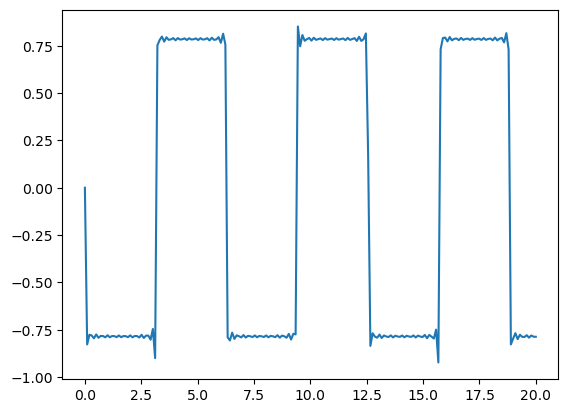

In [6]:
t = np.linspace(0, 20, 200)
s = signal(ampl_carre, phi_carre, w0, t)
plt.plot(t,s)
plt.show()

Puis on applique un filtre passe-haut de pulsation de coupure $\omega_c = \omega_0$ et on affiche le signal d'origine ainsi que le signal filtré

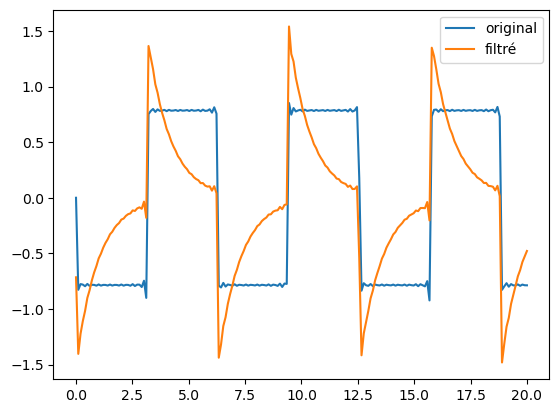

In [7]:
plt.clf()
ampl_f, phi_f = filtre_ph1(ampl_carre, phi_carre, w0, w0)
s_f = signal(ampl_f, phi_f, w0, t)
plt.plot(t,s, label='original')
plt.plot(t,s_f, label='filtré')
plt.legend()
plt.show()

On peut observer l'effet intégrateur du filtre passe-bas, lorsque la pulsation de coupure est beaucoup plus petite que la pulsation du signal. 

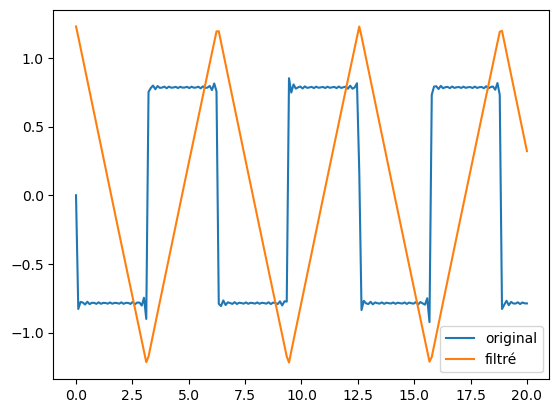

In [8]:
plt.clf()
ampl_f, phi_f = filtre_pb1(ampl_carre, phi_carre, w0, w0/100)
s_f = signal(ampl_f, phi_f, w0, t)
plt.plot(t,s,label='original')
plt.plot(t,100*s_f,label='filtré')
plt.legend()
plt.show()

On peut maintenant faire passer le signal filtré précédent dans un filtre passe-haut de pulsation de coupure bien supérieure à la pulsation du signal pour voir l'effet intégrateur du filtre passe-haut

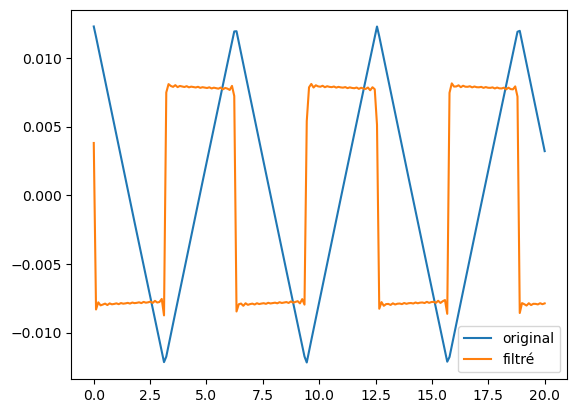

In [9]:
plt.clf()
ampl_f2, phi_f2 = filtre_ph1(ampl_f, phi_f, w0, w0*100)
s_f2 = signal(ampl_f2, phi_f2, w0, t)
plt.plot(t,s_f,label='original')
plt.plot(t,100*s_f2,label='filtré')
plt.legend()
plt.show()